# Exercise 2-2: Write your own code for the Mortality Notebook

In [129]:
# import the Pandas module
import pandas as pd

## Get the long and wide DataFrames

In [130]:
# get the data from the file named mortality_data.pkl.
mortality_long = pd.read_pickle('mortality_prepped.pkl')
mortality_long.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584


In [131]:
# gets the data from the file named mortality_wide.pkl
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215
1903,0.015421,0.004147,0.002682,0.004341
1904,0.015915,0.004250,0.003052,0.004714


## Work With the long DataFrame

In [132]:
# Display the first five rows of the DataFrame.
mortality_long.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,0.019838,1790.87584
1,1901,01-04 Years,0.016950,1502.07584
2,1902,01-04 Years,0.016557,1462.77584
3,1903,01-04 Years,0.015421,1349.17584
4,1904,01-04 Years,0.015915,1398.57584


In [133]:
# Change the name of the “DeathRate” column to “Deaths/100K”,
# since that’s a more accurate description of the data in that column.
mortality_long.columns = mortality_long.columns.str.replace('DeathRate','Deaths/100K')
mortality_long.columns.values

array(['Year', 'AgeGroup', 'Deaths/100K', 'MeanCentered'], dtype=object)

In [134]:
# Access and display the first five rows of the Year and MeanCentered columns.
mortality_long[['Year', 'MeanCentered']].head()

,Year,MeanCentered
0,1900,1790.87584
1,1901,1502.07584
2,1902,1462.77584
3,1903,1349.17584
4,1904,1398.57584


In [135]:
# Access and display the last six rows of data from 1915 through 1920.
mortality_long.query('Year >= 1915 and Year <= 1920').tail(6)

,Year,AgeGroup,Deaths/100K,MeanCentered
372,1915,15-19 Years,0.003309,137.97584
373,1916,15-19 Years,0.003558,162.87584
374,1917,15-19 Years,0.003803,187.37584
375,1918,15-19 Years,0.007774,584.47584
376,1919,15-19 Years,0.004385,245.57584
377,1920,15-19 Years,0.004029,209.97584


In [136]:
# Access and display the Year and Deaths/100K columns for the age group 01-04 Years.
mortality_long.query('AgeGroup == "01-04 Years"')[['Year', 'Deaths/100K']]

,Year,Deaths/100K
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


In [137]:
# Sort the DataFrame by the Deaths/100K column in descending sequence, and display the results. 
# Then, modify the cell so it displays the first and last three rows of the results.
# mortality_long.sort_values('Deaths/100K', ascending=False)
head_df = mortality_long.sort_values('Deaths/100K', ascending=False).head(3)
tail_df = mortality_long.sort_values('Deaths/100K', ascending=False).tail(3)
sliced_df = pd.concat([head_df, tail_df])
print (sliced_df)

     Year     AgeGroup  Deaths/100K  MeanCentered
0    1900  01-04 Years     0.019838    1790.87584
1    1901  01-04 Years     0.016950    1502.07584
2    1902  01-04 Years     0.016557    1462.77584
233  2014  05-09 Years     0.000115    -181.42416
229  2010  05-09 Years     0.000115    -181.42416
231  2012  05-09 Years     0.000114    -181.52416


In [138]:
# Calculate the median of all of the values in the Deaths/100K column.
mortality_long['Deaths/100K'].median()

0.000895

In [139]:
# Group the data by year, and calculate the sum of the Deaths/100K column.
mortality_long.groupby('Year')['Deaths/100K'].sum()

Year
1900    0.032330
1901    0.028506
1902    0.027330
1903    0.026591
1904    0.027931
          ...   
2014    0.000950
2015    0.000995
2016    0.001033
2017    0.001029
2018    0.000996
Name: Deaths/100K, Length: 119, dtype: float64

## Work with the wide DataFrame

In [140]:
# Display the first five rows of the DataFrame.
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,0.019838,0.004661,0.002983,0.004848
1901,0.016950,0.004276,0.002736,0.004544
1902,0.016557,0.004033,0.002525,0.004215
1903,0.015421,0.004147,0.002682,0.004341
1904,0.015915,0.004250,0.003052,0.004714


In [141]:
# Display the index information for the DataFrame.
mortality_wide.info()
print('----------------------------------------')
print(mortality_wide.index)

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1900 to 2018
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   01-04 Years  119 non-null    float64
 1   05-09 Years  119 non-null    float64
 2   10-14 Years  119 non-null    float64
 3   15-19 Years  119 non-null    float64
dtypes: float64(4)
memory usage: 4.6 KB
----------------------------------------
Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
       ...
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype='int64', name='Year', length=119)


In [142]:
# Use the describe() method to display statistical information for the numeric columns in the DataFrame. 
# Start by coding this statement without the T property. Then, add the T property to see how the display changes.
# mortality_wide.describe()
mortality_wide.describe().T
# mortality_wide

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
01-04 Years,119.0,0.003832,0.005005,0.000240,0.000507,0.001091,0.005773,0.019838
05-09 Years,119.0,0.001173,0.001275,0.000114,0.000240,0.000484,0.001989,0.004661
10-14 Years,119.0,0.000938,0.000884,0.000139,0.000272,0.000446,0.001589,0.003751
15-19 Years,119.0,0.001774,0.001384,0.000448,0.000855,0.001069,0.002837,0.007774


In [143]:
# get Year column back
mortality_wide.reset_index(inplace=True)
# mortality_wide.columns.values
# mortality_wide.drop(['level_0'], axis=1, inplace=True)
mortality_wide

AgeGroup,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
0,1900,0.019838,0.004661,0.002983,0.004848
1,1901,0.016950,0.004276,0.002736,0.004544
2,1902,0.016557,0.004033,0.002525,0.004215
3,1903,0.015421,0.004147,0.002682,0.004341
4,1904,0.015915,0.004250,0.003052,0.004714
...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455
115,2015,0.000249,0.000117,0.000146,0.000483
116,2016,0.000253,0.000122,0.000146,0.000512
117,2017,0.000243,0.000116,0.000155,0.000515


In [144]:
# Access and display just the Year and 01-04 Years columns.
mortality_wide.loc[:, ['Year', '01-04 Years']]

AgeGroup,Year,01-04 Years
0,1900,0.019838
1,1901,0.016950
2,1902,0.016557
3,1903,0.015421
4,1904,0.015915
...,...,...
114,2014,0.000240
115,2015,0.000249
116,2016,0.000253
117,2017,0.000243


In [145]:
# Access and display just the rows for the years from 1915 through 1920.
mortality_wide.query('Year >= 1915 and Year <= 1920')

AgeGroup,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years
15,1915,0.009242,0.002606,0.001967,0.003309
16,1916,0.011115,0.002824,0.002051,0.003558
17,1917,0.010660,0.002907,0.002189,0.003803
18,1918,0.015735,0.004479,0.003751,0.007774
19,1919,0.009280,0.003000,0.002364,0.004385
20,1920,0.009872,0.002952,0.002299,0.004029


In [146]:
# Combine steps 16 and 17 into a single cell that accesses and displays the Year and 01-04 Years columns 
# for the years from 1915 through 1920.
mortality_wide.query('Year >= 1915 and Year <= 1920')[['Year', '01-04 Years']]

AgeGroup,Year,01-04 Years
15,1915,0.009242
16,1916,0.011115
17,1917,0.010660
18,1918,0.015735
19,1919,0.009280
20,1920,0.009872


In [147]:
# Aggregate the data for all numeric columns in each year, and display the mean, median, and sum for those columns.
mortality_wide.groupby('Year').agg(['mean', 'median', 'sum'])

AgeGroup 01-04 Years                     05-09 Years                      \
                mean    median       sum        mean    median       sum   
Year                                                                       
1900        0.019838  0.019838  0.019838    0.004661  0.004661  0.004661   
1901        0.016950  0.016950  0.016950    0.004276  0.004276  0.004276   
1902        0.016557  0.016557  0.016557    0.004033  0.004033  0.004033   
1903        0.015421  0.015421  0.015421    0.004147  0.004147  0.004147   
1904        0.015915  0.015915  0.015915    0.004250  0.004250  0.004250   
...              ...       ...       ...         ...       ...       ...   
2014        0.000240  0.000240  0.000240    0.000115  0.000115  0.000115   
2015        0.000249  0.000249  0.000249    0.000117  0.000117  0.000117   
2016        0.000253  0.000253  0.000253    0.000122  0.000122  0.000122   
2017        0.000243  0.000243  0.000243    0.000116  0.000116  0.000116   
2018        0.000240  0.000240  0.000240    0.000115  0.000115  0.000115   

AgeGroup 10-14 Years                     15-19 Years                      
                mean    median       sum        mean    median       sum  
Year                                                                      
1900        0.002983  0.002983  0.002983    0.004848  0.004848  0.004848  
1901        0.002736  0.002736  0.002736    0.004544  0.004544  0.004544  
1902        0.002525  0.002525  0.002525    0.004215  0.004215  0.004215  
1903        0.002682  0.002682  0.002682    0.004341  0.004341  0.004341  
1904        0.003052  0.003052  0.003052    0.004714  0.004714  0.004714  
...              ...       ...       ...         ...       ...       ...  
2014        0.000140  0.000140  0.000140    0.000455  0.000455  0.000455  
2015        0.000146  0.000146  0.000146    0.000483  0.000483  0.000483  
2016        0.000146  0.000146  0.000146    0.000512  0.000512  0.000512  
2017        0.000155  0.000155  0.000155    0.000515  0.000515  0.000515  
2018        0.000149  0.000149  0.000149    0.000492  0.000492  0.000492  

[119 rows x 12 columns]

In [148]:
# Add a new column to the DataFrame named TotalDeaths. 
# The value of this column should be the sum of the values in each of the year range columns. 
# Display the DataFrame with the new column.
mortality_wide['TotalDeaths'] = mortality_wide['01-04 Years'] + mortality_wide['05-09 Years'] \
                                + mortality_wide['10-14 Years'] + mortality_wide['15-19 Years']
mortality_wide

AgeGroup,Year,01-04 Years,05-09 Years,10-14 Years,15-19 Years,TotalDeaths
0,1900,0.019838,0.004661,0.002983,0.004848,0.032330
1,1901,0.016950,0.004276,0.002736,0.004544,0.028506
2,1902,0.016557,0.004033,0.002525,0.004215,0.027330
3,1903,0.015421,0.004147,0.002682,0.004341,0.026591
4,1904,0.015915,0.004250,0.003052,0.004714,0.027931
...,...,...,...,...,...,...
114,2014,0.000240,0.000115,0.000140,0.000455,0.000950
115,2015,0.000249,0.000117,0.000146,0.000483,0.000995
116,2016,0.000253,0.000122,0.000146,0.000512,0.001033
117,2017,0.000243,0.000116,0.000155,0.000515,0.001029


<Axes: xlabel='Year'>

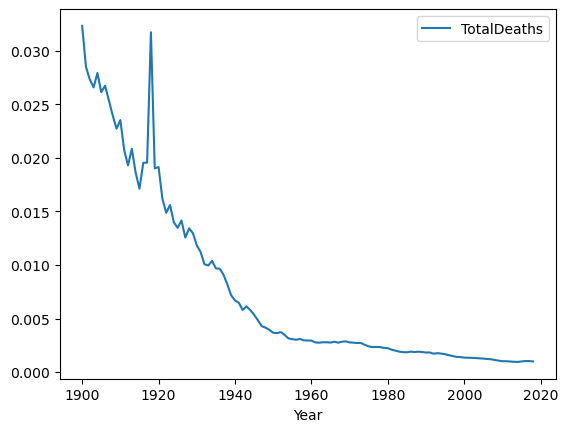

In [149]:
# Create a line plot that shows the total death rates by year.
mortality_wide.plot(x = 'Year', y = 'TotalDeaths')